In [1]:
using PyPlot

In [154]:
function armod(i,j)
    return (mod(i-1+j,j)+1)  
end
function Transition(i)
    d=rand(1:4)
    if d==1
        return armod(i-3,9);
    elseif d==2
        row=convert(Int,floor((i-1)/3));
        return armod(i-1,3)+3*row;
    elseif d==3
        row=convert(Int,floor((i-1)/3));
        return armod(i+1,3)+3*row;
    else
        return armod(i+3,9);
    end    
end

Transition (generic function with 1 method)

In [172]:
Naccumulated[current]+=1;
tn=1000;
current=1;
Naccumulated[current]+=1;

for ii in 1:tn
    current=Transition(current);
    Naccumulated[current]+=1;
end
Naccumulated=Naccumulated/tn;

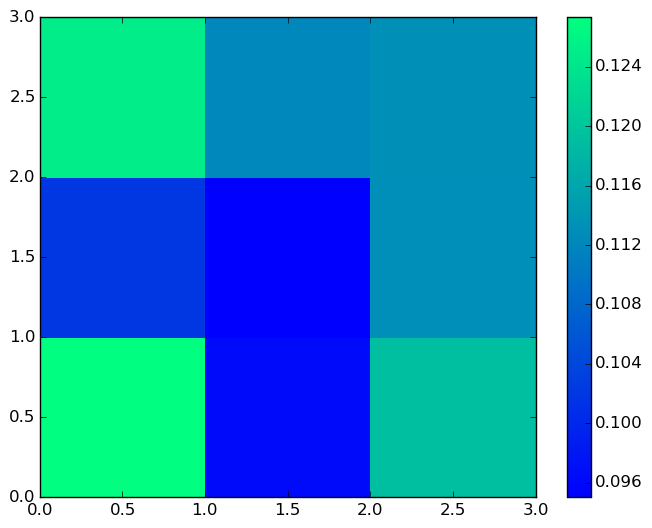

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f3ed1f22d88>

In [173]:
pcolor(reshape(Naccumulated,3,3),cmap="winter")
colorbar()